In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

quantile_list=[0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]
#reading the loan data from csv file
loan_df = pd.read_csv("loan.csv")
loan_df.head()


C:\Users\karthik\AppData\Local\Temp\ipykernel_14680\1621897256.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
#Find the rows and columns
loan_df.shape

(39717, 111)

In [3]:
loan_df.nunique()
print(loan_df.shape)
loan_df = loan_df[[col for col in loan_df.columns if loan_df[col].duplicated().any()]]
print(loan_df.shape)
loan_df.nunique()

(39717, 111)
(39717, 108)


loan_amnt                      885
funded_amnt                   1041
funded_amnt_inv               8205
term                             2
int_rate                       371
                              ... 
tax_liens                        1
tot_hi_cred_lim                  0
total_bal_ex_mort                0
total_bc_limit                   0
total_il_high_credit_limit       0
Length: 108, dtype: int64

In [4]:
#remove the columns having null values
loan_df.dropna(axis=1,how='all',inplace=True)
loan_df.shape
#remove the columns having same value in all the rows
nunique = loan_df.nunique()
cols_to_drop = nunique[nunique == 1].index
loan_df.drop(cols_to_drop, axis=1,inplace=True)
loan_df.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [5]:
non_approval_col_list=[ "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"]
loan_df.drop(non_approval_col_list,axis=1,inplace=True)
loan_df.shape

(39717, 22)

In [6]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0.0


In [7]:
loan_df.nunique()

loan_amnt                 885
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
dti                      2868
earliest_cr_line          526
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_util               1089
total_acc                  82
pub_rec_bankruptcies        3
dtype: int64

In [8]:
#Remove rows which are current or in progress
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.shape

(38577, 22)

In [9]:
loan_df.loan_amnt.quantile(quantile_list)

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

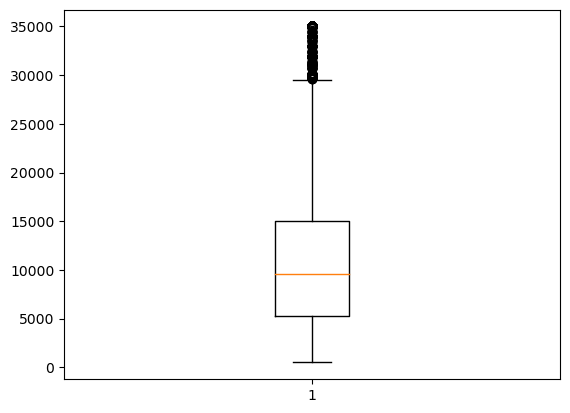

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(loan_df.loan_amnt)
plt.show()

Analysing based on Grade


<Axes: xlabel='grade', ylabel='count'>

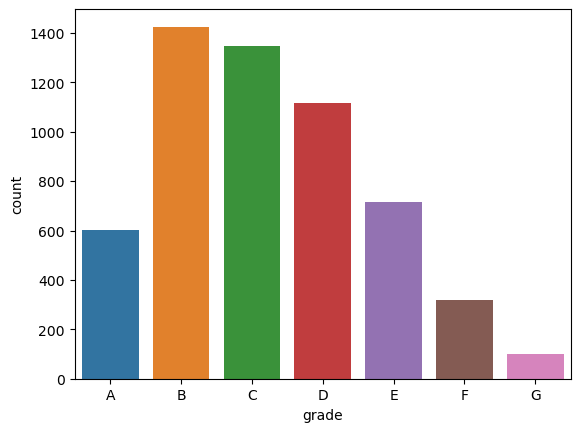

In [11]:
import seaborn as sns
#Analysing categorical data

#1 Grade Analysis
print("Analysing based on Grade")
#loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='sub_grade', ylabel='count'>

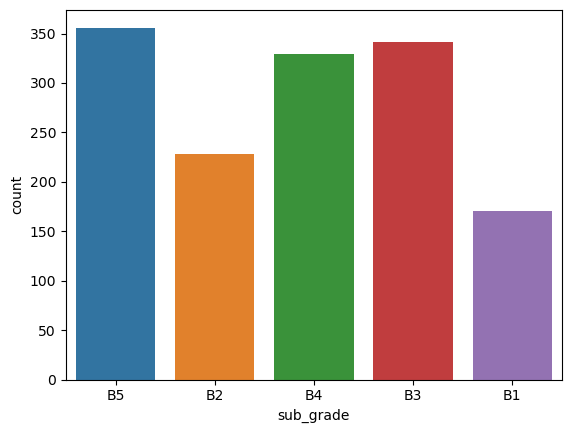

In [12]:
sns.countplot(x = 'sub_grade', data = loan_df[(loan_df.loan_status == 'Charged Off') & (loan_df.grade == 'B')])


# Observations
The above analysis with respect to the charged off loans suggests that there is a more probability of defaulting when :

1. Grade is 'B'
2. And sub-grade is 'B5'.

Analysis based on home ownership


<Axes: xlabel='home_ownership', ylabel='count'>

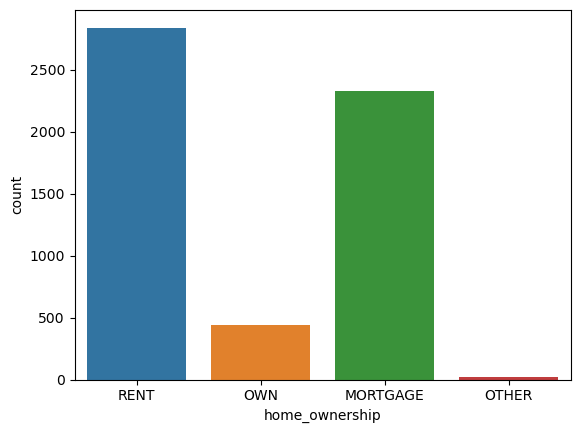

In [13]:
#Analysis for house ownership
print('Analysis based on home ownership')
sns.countplot(x = 'home_ownership',data = loan_df[loan_df.loan_status == 'Charged Off'])

# Observations
The above analysis with respect to the charged off loans suggests that there is a more probability of defaulting when :

1. Home ownership is rent

Analysis based on purpose


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'other'),
  Text(3, 0, 'debt_consolidation'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'moving'),
  Text(8, 0, 'vacation'),
  Text(9, 0, 'house'),
  Text(10, 0, 'medical'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

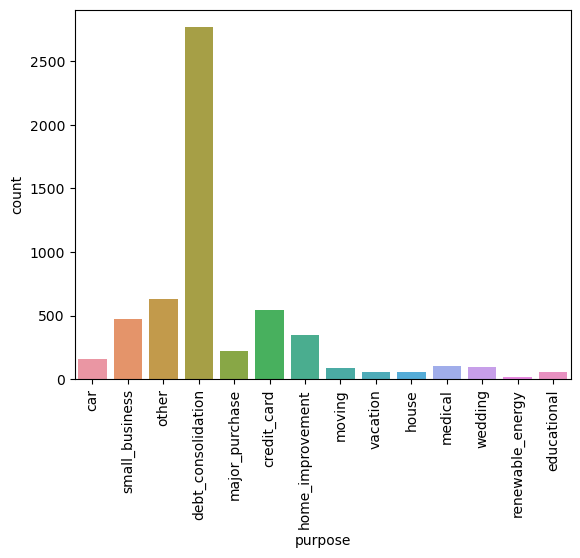

In [14]:
#Analysis for house ownership
print('Analysis based on purpose')
sns.countplot(x = 'purpose',data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)

# Observations
The above analysis with respect to the charged off loans suggests that there is a more probability of defaulting when :

1. The purpose is debt_consolidation

In [15]:
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.str.replace('%',''))
loan_df.head()
loan_df.int_rate.min()

5.42

In [16]:
loan_df.head()
loan_df.int_rate.min()

5.42

In [17]:
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins=4,precision =0,labels=['5-10','10-15','15-20','20-25'])
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_range
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0,10-15
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.40%,4,0.0,15-20
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0,15-20
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21%,37,0.0,10-15
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0,5-10


Analysis based on int_rate_range


<Axes: xlabel='int_rate_range', ylabel='count'>

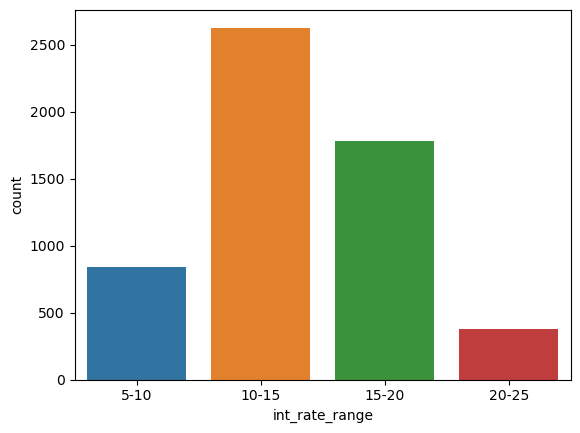

In [18]:
#Analysis for house ownership
print('Analysis based on int_rate_range')
sns.countplot(x = 'int_rate_range',data = loan_df[loan_df.loan_status == 'Charged Off'])

# Observations
The above analysis with respect to the charged off loans suggests that there is a more probability of defaulting when :

1. The interest rate is between 10% - 15%

In [19]:
loan_df=loan_df[loan_df['annual_inc'].notna()]
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=[1000,50000,100000,150000,200000],precision =0,labels =['1k-50k','50k-100k','100k-150k','150k-200k'])


In [20]:
loan_df[loan_df.annual_inc_bin == '150k-200k']
loan_df.annual_inc_bin.unique()

['1k-50k', '50k-100k', '100k-150k', NaN, '150k-200k']
Categories (4, object): ['1k-50k' < '50k-100k' < '100k-150k' < '150k-200k']

<Axes: xlabel='annual_inc_bin', ylabel='count'>

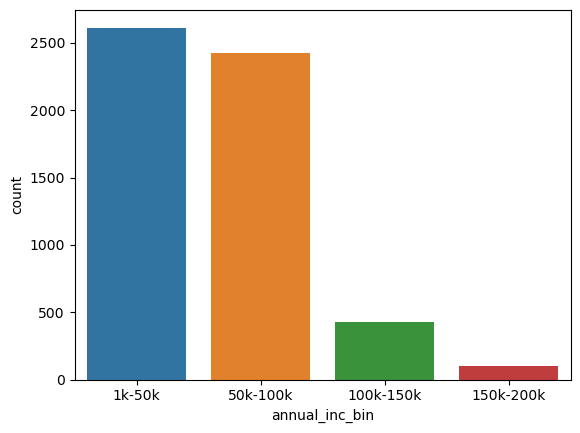

In [21]:
sns.countplot(x = 'annual_inc_bin',data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_bin', ylabel='count'>

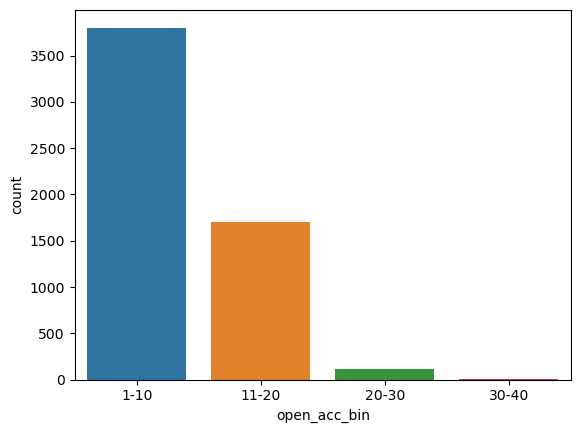

In [22]:
loan_df.open_acc.unique()
loan_df['open_acc_bin']= pd.cut(loan_df.open_acc, bins=[1,10,20,30,41],precision=0,labels=['1-10','11-20','20-30','30-40'])
sns.countplot(x = 'open_acc_bin',data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

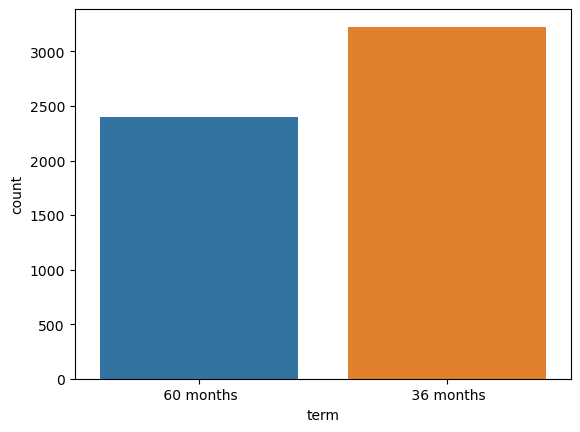

In [23]:
sns.countplot(x='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

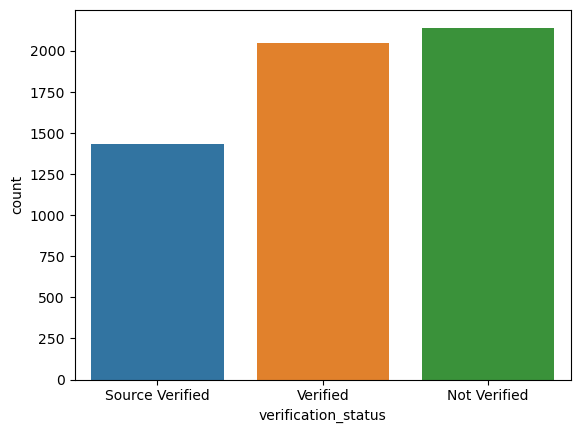

In [24]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

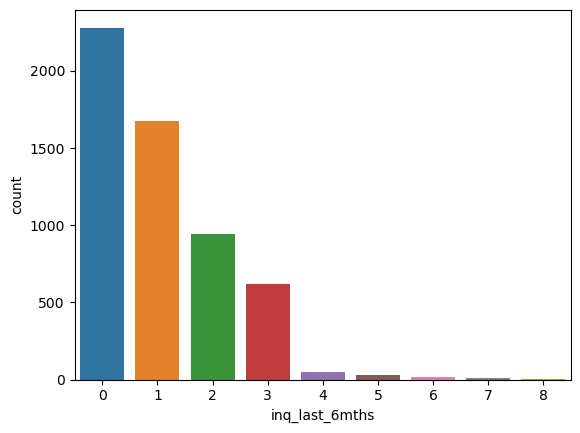

In [25]:
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [26]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

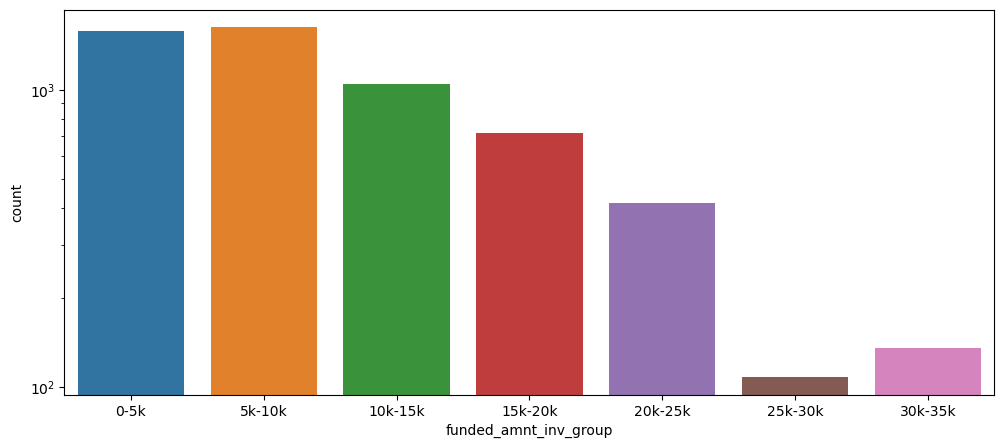

In [27]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

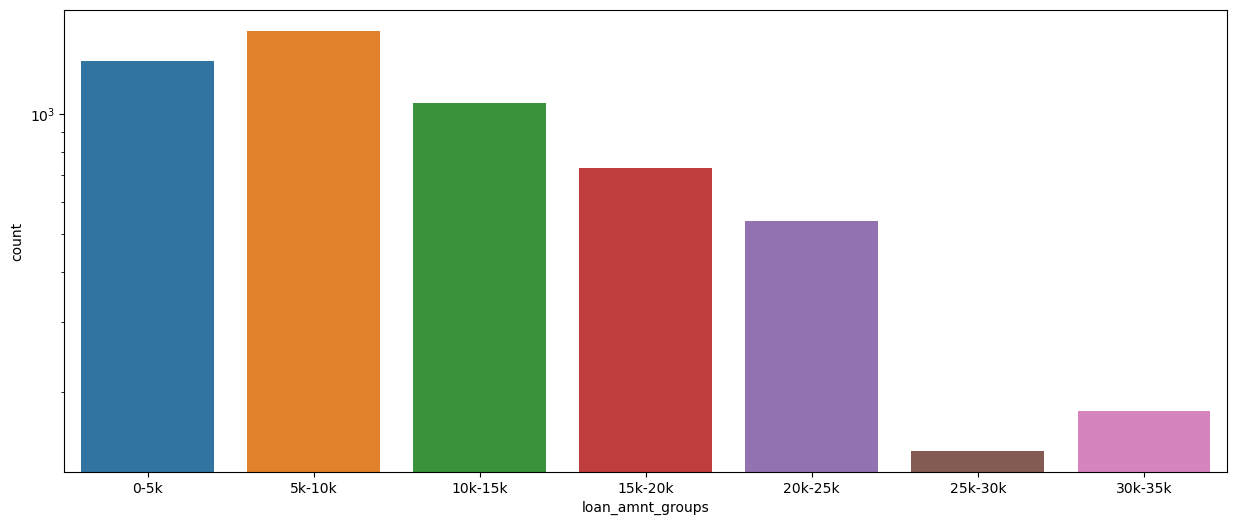

In [28]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])


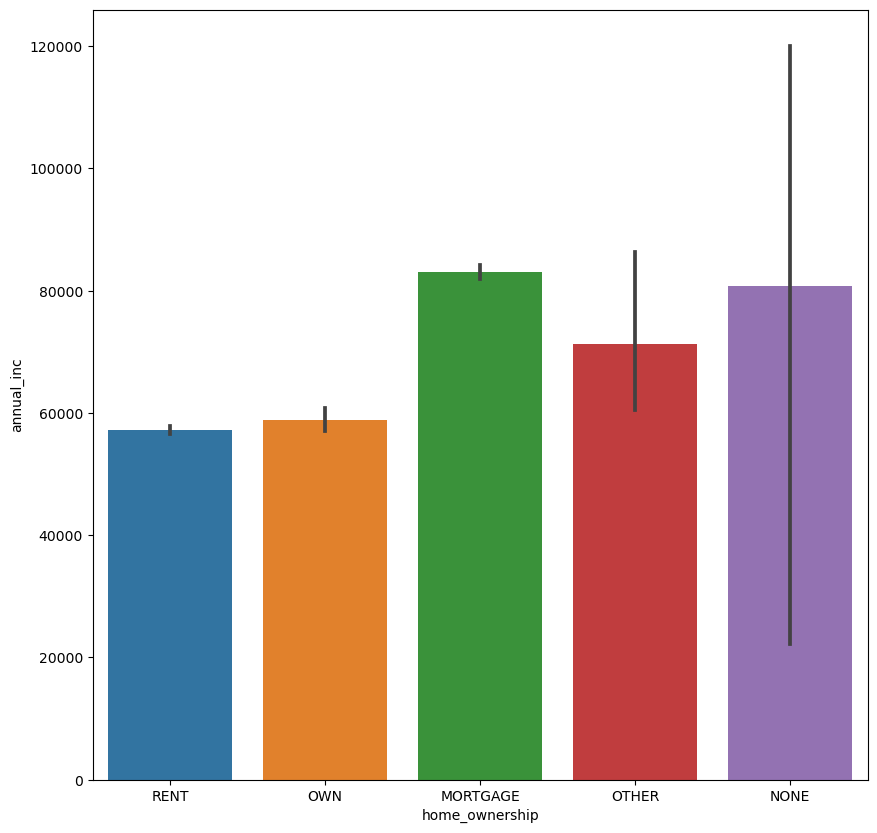

In [29]:
# ### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
# - Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

# #### 2.Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc')
plt.show()


<Axes: xlabel='annual_inc_bin', ylabel='loan_amnt'>

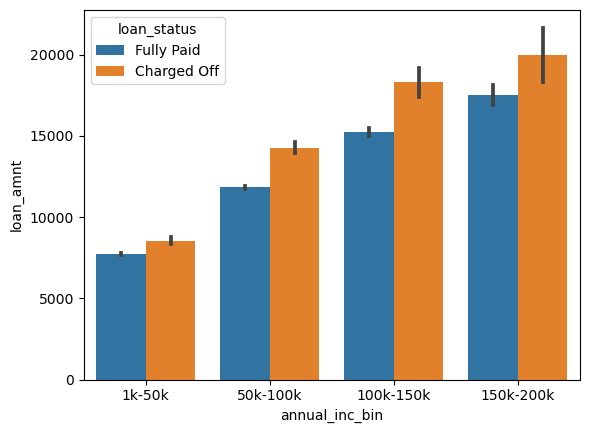

In [30]:
sns.barplot(x = "annual_inc_bin", y = "loan_amnt", hue = 'loan_status', data = loan_df)


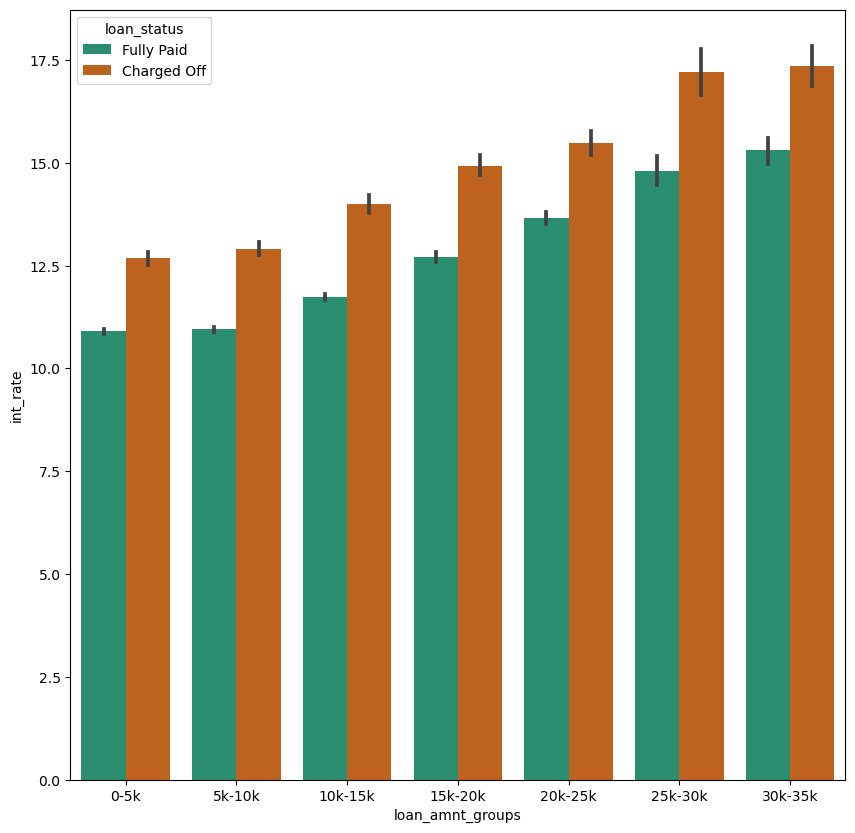

In [45]:
# #### 1.Loan Amount vs Interest Rate

# In[62]:


plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="Dark2")
plt.show()


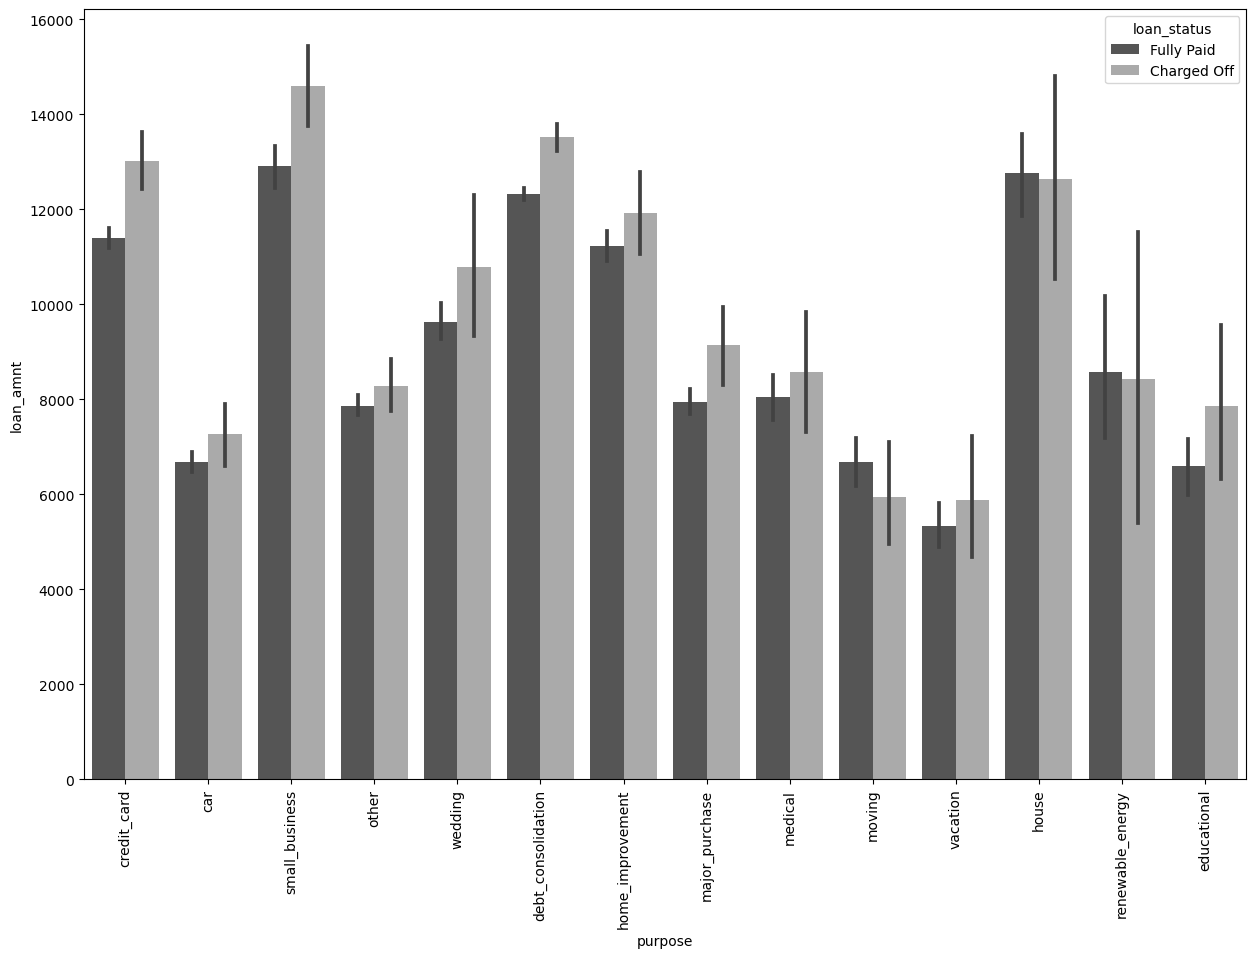

In [49]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data =loan_df,y='loan_amnt', x='purpose', hue ='loan_status',palette="gist_gray")
plt.show()

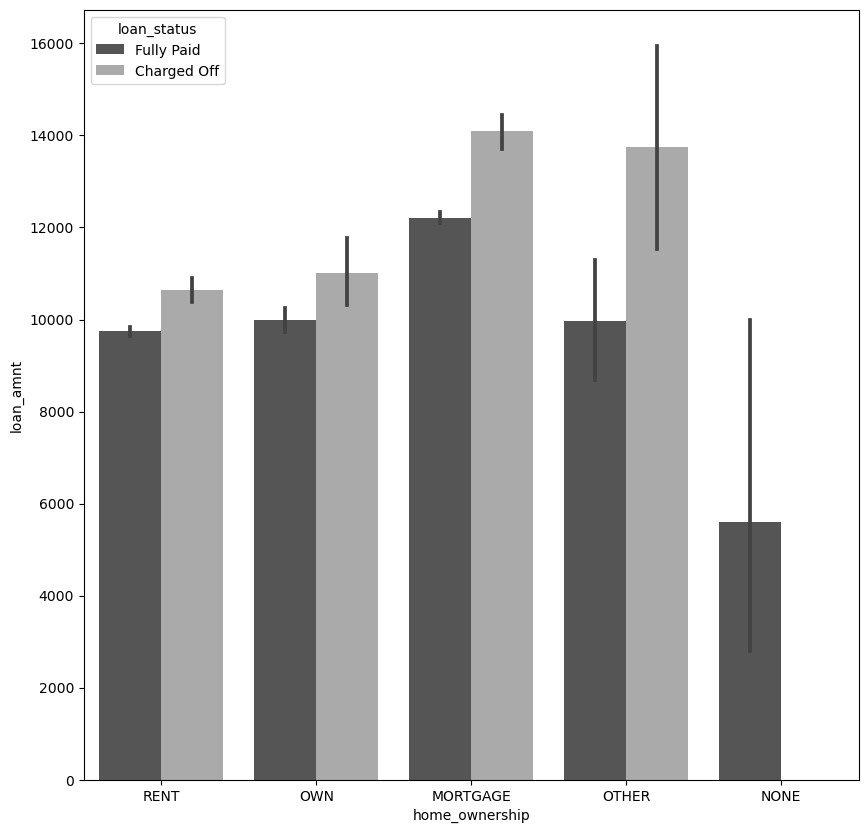

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,y='loan_amnt', x='home_ownership', hue ='loan_status',palette="gist_gray")
plt.show()


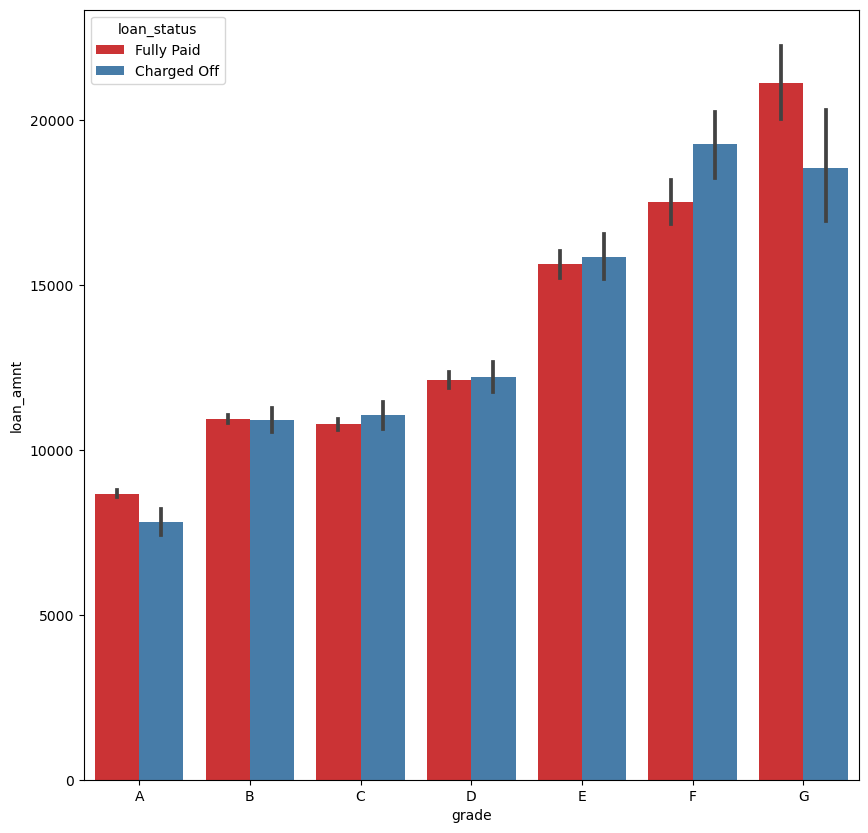

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,y='loan_amnt', x='grade', hue ='loan_status',palette="Set1", order=['A','B','C','D','E','F','G'])
plt.show()
